In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.empty((100,2))
np.random.seed(666)
x[:,0] = np.random.uniform(0.,100.,size=100)
x[:,1] = 0.75* x[:,0]+3.+np.random.normal(0,10.,size=100)

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
print(pca)
pca.fit(x)
print(pca.components_)#运算出来和自己写的梯度上升法比较，坐标正好都是负数，相反
x_reduction = pca.transform(x)
x_restore = pca.inverse_transform(x_reduction)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-0.77660922 -0.62998263]]


0.9866666666666667
0.9866666666666667
[1.45668166e-01 1.37354688e-01 1.17777287e-01 8.49968861e-02
 5.86018996e-02 5.11542945e-02 4.26605279e-02 3.60119663e-02
 3.41105814e-02 3.05407804e-02 2.42337671e-02 2.28700570e-02
 1.80304649e-02 1.79346003e-02 1.45798298e-02 1.42044841e-02
 1.29961033e-02 1.26617002e-02 1.01728635e-02 9.09314698e-03
 8.85220461e-03 7.73828332e-03 7.60516219e-03 7.11864860e-03
 6.85977267e-03 5.76411920e-03 5.71688020e-03 5.08255707e-03
 4.89020776e-03 4.34888085e-03 3.72917505e-03 3.57755036e-03
 3.26989470e-03 3.14917937e-03 3.09269839e-03 2.87619649e-03
 2.50362666e-03 2.25417403e-03 2.20030857e-03 1.98028746e-03
 1.88195578e-03 1.52769283e-03 1.42823692e-03 1.38003340e-03
 1.17572392e-03 1.07377463e-03 9.55152460e-04 9.00017642e-04
 5.79162563e-04 3.82793717e-04 2.38328586e-04 8.40132221e-05
 5.60545588e-05 5.48538930e-05 1.08077650e-05 4.01354717e-06
 1.23186515e-06 1.05783059e-06 6.06659094e-07 5.86686040e-07
 1.71368535e-33 7.44075955e-34 7.44075955e-34 7

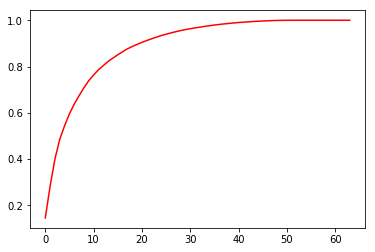

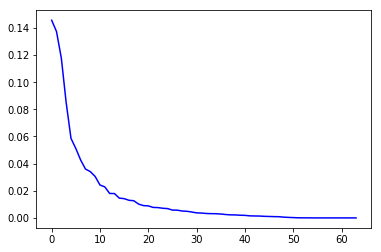

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
x=digits.data
y=digits.target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
print(knn_clf.score(x_test,y_test))

from sklearn.decomposition import PCA
pca=PCA(n_components=64)
#也可以输入pca=PCA(0.95)
#之后再pca.n_components_ 输出自动匹配的n_component值，此例里为28，准确度下降0.6%，但速度快了10倍
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(x_train_reduction,y_train)
print(knn_clf2.score(x_test_reduction,y_test))#精度降低但速度变快

print(pca.explained_variance_ratio_)#解释比例（第n个pca分别能解释百分之多少原数据的方差）,重要程度
sum_explained = np.sum(pca.explained_variance_ratio_)
print(sum_explained)

plt.plot([i for i in range(x_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1])for i in range(x_train.shape[1])],color='r')
plt.figure()
plt.plot([i for i in range(x_train.shape[1])],
        [pca.explained_variance_ratio_[i]for i in range(x_train.shape[1])],color='b')
plt.show()



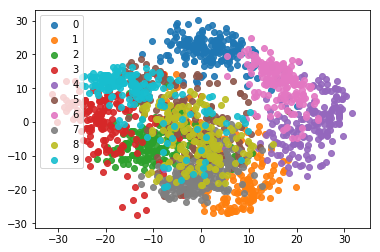

In [3]:
pca = PCA(n_components=2)
pca.fit(x)
x_reduction=pca.transform(x)

for i in range(10):
    plt.scatter(x_reduction[y==i,0],x_reduction[y==i,1],alpha=0.9,label=i)#0-9 10个数字在二维也有一定的区分度，通过颜色表示
                                                                  #区分蓝色表示的数字和红色表示的数字，降至二维都已经足够了
plt.legend()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
x=digits.data
y=digits.target
noisy_digits = x + np.random.normal(0,4,size = x.shape)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(noisy_digits,y,random_state=666)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
print(knn_clf.score(x_test,y_test))

#用PCA降噪
from sklearn.decomposition import PCA
pca=PCA(0.95)

#也可以输入pca=PCA(0.95)
#之后再pca.n_components_ 输出自动匹配的n_component值，此例里为28，准确度下降0.6%，但速度快了10倍
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)
x_train_restore = pca.inverse_transform(x_train_reduction)
x_test_restore = pca.inverse_transform(x_test_reduction)

knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(x_train_restore,y_train)
print(knn_clf2.score(x_test_restore,y_test))#精度降低但速度变快





0.9155555555555556
0.9155555555555556
